In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline
df_train= pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [3]:
df_train
#欠損処理とダミー変数化をする

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [4]:
c=pd.get_dummies(df_train['Embarked'])
f =pd.get_dummies(df_train['Sex'])
f

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1
5,0,1
6,0,1
7,0,1
8,1,0
9,1,0


In [5]:
b=df_train.drop("Embarked",axis=1)
g=b.drop("Sex",axis=1)
d=pd.concat([g,c], axis=1)
h=pd.concat([d,f], axis=1)
e=pd.DataFrame(h,columns=["PassengerId","Survived","Pclass","Name","female","male","Age","SibSp","Parch","Ticket","Fare","Cabin","C","Q","S"])
e
#cabinは欠損値が多すぎる上にダミー変数も入れられないのであまりやくに立たなそう。Ticket番号もpclassがあるし、そこまで重要ではなさそう。
#念のためダミー変数化しておいたがEmbarkedも乗った港で生死にそこまで影響があるとは考えにくい
#まずはpclassやFareで分類してみる。良い席の方が非常口が近かったり、使用人なども連れていて守られてそうだから
#次に子供や若い人、妻の方がが優先して救出してもらえそう。

,PassengerId,Survived,Pclass,Name,female,male,Age,SibSp,Parch,Ticket,Fare,Cabin,C,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",0,1,22.0,1,0,A/5 21171,7.2500,NaN,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,0,38.0,1,0,PC 17599,71.2833,C85,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",1,0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,0,35.0,1,0,113803,53.1000,C123,0,0,1
4,5,0,3,"Allen, Mr. William Henry",0,1,35.0,0,0,373450,8.0500,NaN,0,0,1
5,6,0,3,"Moran, Mr. James",0,1,NaN,0,0,330877,8.4583,NaN,0,1,0
6,7,0,1,"McCarthy, Mr. Timothy J",0,1,54.0,0,0,17463,51.8625,E46,0,0,1
7,8,0,3,"Palsson, Master. Gosta Leonard",0,1,2.0,3,1,349909,21.0750,NaN,0,0,1
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",1,0,27.0,0,2,347742,11.1333,NaN,0,0,1
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",1,0,14.0,1,0,237736,30.0708,NaN,1,0,0


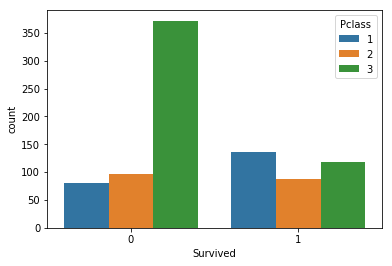

In [6]:
from collections import Counter
sns.countplot("Survived", data = df_train, hue = "Pclass")
#確かになくなった人の中ではpclassの3を買った人が多い

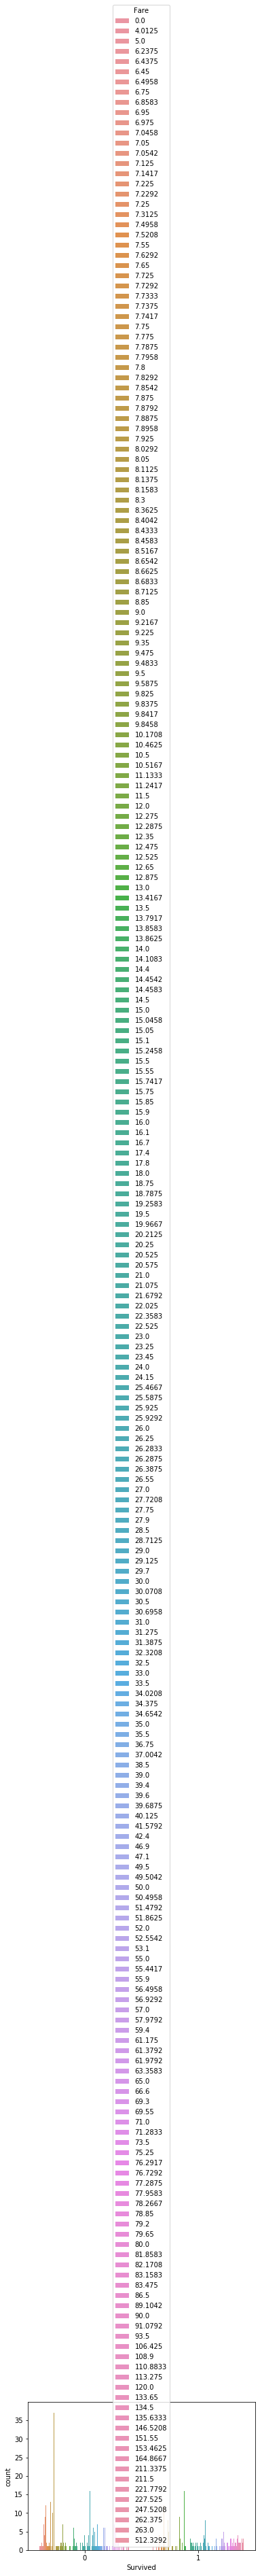

In [7]:
from collections import Counter
sns.countplot("Survived", data = df_train, hue = "Fare")
#確かになんとなくなくなった人の中にはFareが低い人が多そう

/Users/matuura/.pyenv/versions/anaconda3-5.0.0/lib/python3.6/site-packages/numpy/lib/function_base.py:748: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= mn)
/Users/matuura/.pyenv/versions/anaconda3-5.0.0/lib/python3.6/site-packages/numpy/lib/function_base.py:749: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= mx)


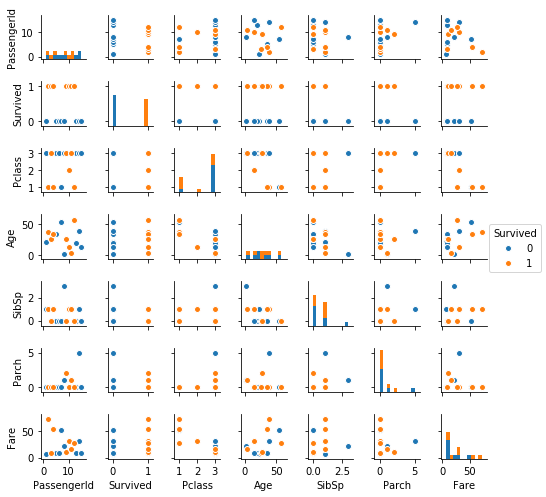

In [8]:
a = df_train.head(15)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.pairplot(a, hue='Survived', size=1.0)
plt.show()

In [9]:
a_1=e.loc[:,["Pclass","Fare"]]
b_1=e.loc[:,"Survived"]
X_1 = a_1.values
y_1 = b_1.values

In [10]:
from sklearn.model_selection import train_test_split
X_1_train, X_1_test, y_1_train, y_1_test = train_test_split(X_1, y_1, test_size=0.3, random_state=0)

In [11]:
from sklearn.svm import SVC
rbf_svm = SVC(kernel='rbf', gamma=0.1, C=100)
rbf_svm.fit(X_1_train, y_1_train)

SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [12]:
def plot_decision_regions(X, y, classifier, resolution=0.02):
    from matplotlib.colors import ListedColormap
    markers = ("s", "x", "o", "^", "v")
    colors = ("red", "blue", "lightgreen", "gray", "cyan")
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    x1_min, x1_max = X[:, 0].min()-1 , X[:, 0].max() +1
    x2_min, x2_max = X[:, 1].min()-1 , X[:, 1].max() +1
    
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.8, c=cmap(idx),marker=markers[idx], label=cl)
    plt.show()

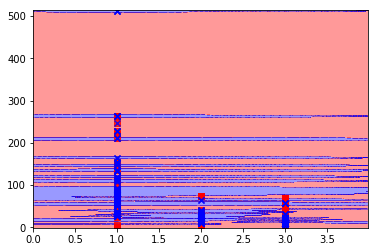

In [13]:
plot_decision_regions(X_1, y_1, classifier=rbf_svm)

In [14]:
rbf_svm.score(X_1_test, y_1_test)
#うまく分類できていないので、チューニングしてみる

0.71641791044776115

In [15]:
from sklearn.metrics import confusion_matrix
cm_1 = confusion_matrix(y_1_test, rbf_svm.predict(X_1_test))
cm_1

array([[139,  29],
       [ 47,  53]])

In [16]:
def plot_cm(confmat):
    fig, ax = plt.subplots(figsize=(5, 5))
    ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
    for i in range(confmat.shape[0]):
        for j in range(confmat.shape[1]):
            ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')
    plt.title('predicted label')
    plt.ylabel('true label')
    plt.tight_layout() 
    plt.show()

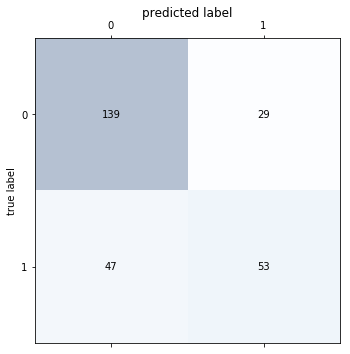

In [17]:
plot_cm(cm_1)
#0の分類よりも比較的1の分類ができていない

In [18]:
from sklearn import metrics
metrics.precision_score(y_1_test, rbf_svm.predict(X_1_test))
#偽陽性が多いのでやはり適合率が低い

0.64634146341463417

In [19]:
param_grid = {'C': [0.1, 1.0, 10, 100, 1000, 10000],
              'gamma': [0.001, 0.01, 0.1, 1, 10]}
from sklearn.model_selection import StratifiedKFold
kf_5 = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
gs_svc = GridSearchCV(SVC(), param_grid, cv=kf_5)

In [20]:
gs_svc.fit(X_1_train, y_1_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=0, shuffle=True),
       error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': [0.1, 1.0, 10, 100, 1000, 10000], 'gamma': [0.001, 0.01, 0.1, 1, 10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [21]:
gs_svc.best_params_

{'C': 10000, 'gamma': 0.01}

In [22]:
from sklearn.svm import SVC
rbf_svm = SVC(kernel='rbf', gamma=0.01, C=10000)
rbf_svm.fit(X_1_train, y_1_train)

SVC(C=10000, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [23]:
rbf_svm.score(X_1_test, y_1_test)
#チューニングしてみたが、大きく変化はなし

0.68656716417910446

In [24]:
c_1=e.loc[:,"Pclass"]
z_1=c_1.values
from sklearn.model_selection import train_test_split
z_1_train, z_1_test, y_1_train, y_1_test = train_test_split(X_1, y_1, test_size=0.3, random_state=0)

In [25]:
from sklearn.svm import SVC
svc = SVC(kernel='linear')
svc.fit(z_1_train, y_1_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

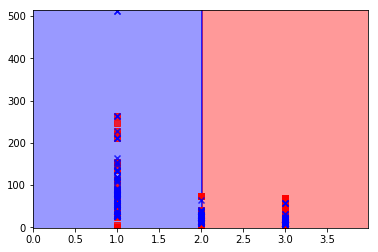

In [26]:
plot_decision_regions(z_1_train, y_1_train, svc)

In [27]:
svc.score(X_1_test, y_1_test)

0.69402985074626866

In [28]:
from sklearn.tree import DecisionTreeClassifier
tree_1 = DecisionTreeClassifier(random_state=0)
tree_1.fit(X_1_train, y_1_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

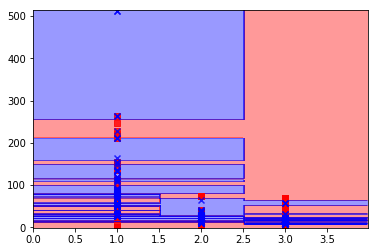

In [29]:
plot_decision_regions(X_1_train, y_1_train, tree_1)

In [30]:
tree_1.score(X_1_train, y_1_train)

0.8186195826645265

In [31]:
tree_1.score(X_1_test, y_1_test)
#過学習しているので、ランダムフォレストと勾配ブースティングを用いてチューニングもしてみる

0.71268656716417911

In [32]:
from sklearn.ensemble import RandomForestClassifier
rfc_1 = RandomForestClassifier(random_state=0, n_estimators=40)
rfc_1.fit(X_1_train, y_1_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=40, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

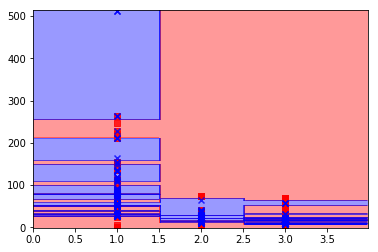

In [33]:
plot_decision_regions(X_1_train, y_1_train, rfc_1)

In [34]:
rfc_1.score(X_1_train, y_1_train)

0.8186195826645265

In [35]:
rfc_1.score(X_1_test, y_1_test)

0.72761194029850751

In [36]:
from sklearn.ensemble import GradientBoostingClassifier
gbct = GradientBoostingClassifier(random_state=0, max_depth=3, learning_rate=0.1)
gbct.fit(X_1_train, y_1_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=0, subsample=1.0, verbose=0,
              warm_start=False)

In [37]:
gbct.score(X_1_train, y_1_train)

0.7720706260032103

In [38]:
gbct.score(X_1_test, y_1_test)
#過学習は抑えられたが、正当率は上がらず

0.70895522388059706

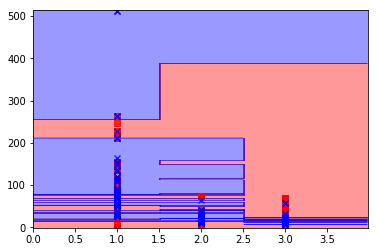

In [39]:
plot_decision_regions(X_1_train, y_1_train, gbct)

In [40]:
param_grid ={"n_estimators": [i for i in range(30, 80, 10)],
            "max_depth": [i for i in range(2,5)]}
from sklearn.grid_search import GridSearchCV
rf_clf2  = GridSearchCV(RandomForestClassifier(), param_grid, cv=5)
rf_clf2.fit(X_1_train, y_1_train)

/Users/matuura/.pyenv/versions/anaconda3-5.0.0/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/Users/matuura/.pyenv/versions/anaconda3-5.0.0/lib/python3.6/site-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_estimators': [30, 40, 50, 60, 70], 'max_depth': [2, 3, 4]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)

In [41]:
rf_clf2.best_params_

{'max_depth': 4, 'n_estimators': 70}

In [42]:
from sklearn.ensemble import RandomForestClassifier
rfc_1 = RandomForestClassifier(random_state=0, max_depth=4,n_estimators=60)
rfc_1.fit(X_1_train, y_1_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=4, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=60, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

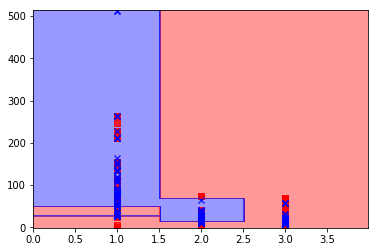

In [43]:
plot_decision_regions(X_1_train, y_1_train, rfc_1)

In [44]:
rfc_1.score(X_1_train, y_1_train)

0.7271268057784912

In [45]:
rfc_1.score(X_1_test, y_1_test)

0.70895522388059706

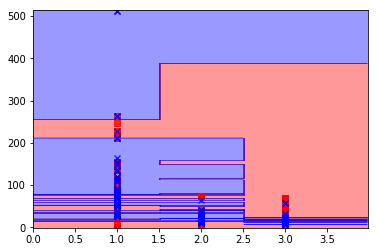

In [46]:
plot_decision_regions(X_1_train, y_1_train, gbct)

In [47]:
param_grid ={"n_estimators": [i for i in range(30, 80, 10)],
            "max_depth": [i for i in range(2,5)]}
from sklearn.grid_search import GridSearchCV
rf_clf2  = GridSearchCV(RandomForestClassifier(), param_grid, cv=5)
rf_clf2.fit(X_1_train, y_1_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_estimators': [30, 40, 50, 60, 70], 'max_depth': [2, 3, 4]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)

In [48]:
param_grid ={"n_estimators": [i for i in range(30, 80, 10)],
            "max_depth": [i for i in range(2,5)]}
from sklearn.grid_search import GridSearchCV
rf_clf3  = GridSearchCV(GradientBoostingClassifier(), param_grid, cv=5)
rf_clf3.fit(X_1_train, y_1_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_estimators': [30, 40, 50, 60, 70], 'max_depth': [2, 3, 4]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)

In [49]:
rf_clf3.best_params_

{'max_depth': 2, 'n_estimators': 50}

In [50]:
from sklearn.ensemble import GradientBoostingClassifier
gbct = GradientBoostingClassifier(random_state=0, max_depth=2, learning_rate=0.1,n_estimators=50)
gbct.fit(X_1_train, y_1_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=2,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=50,
              presort='auto', random_state=0, subsample=1.0, verbose=0,
              warm_start=False)

In [51]:
gbct.score(X_1_train, y_1_train)

0.7110754414125201

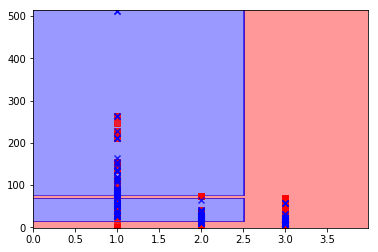

In [52]:
plot_decision_regions(X_1_train, y_1_train, gbct)

In [53]:
gbct.score(X_1_test, y_1_test)
#過学習は抑えられたが、正当率は上がらず.pclassだけで生死は分類できなさそう。さらに条件を加えてみる

0.70895522388059706

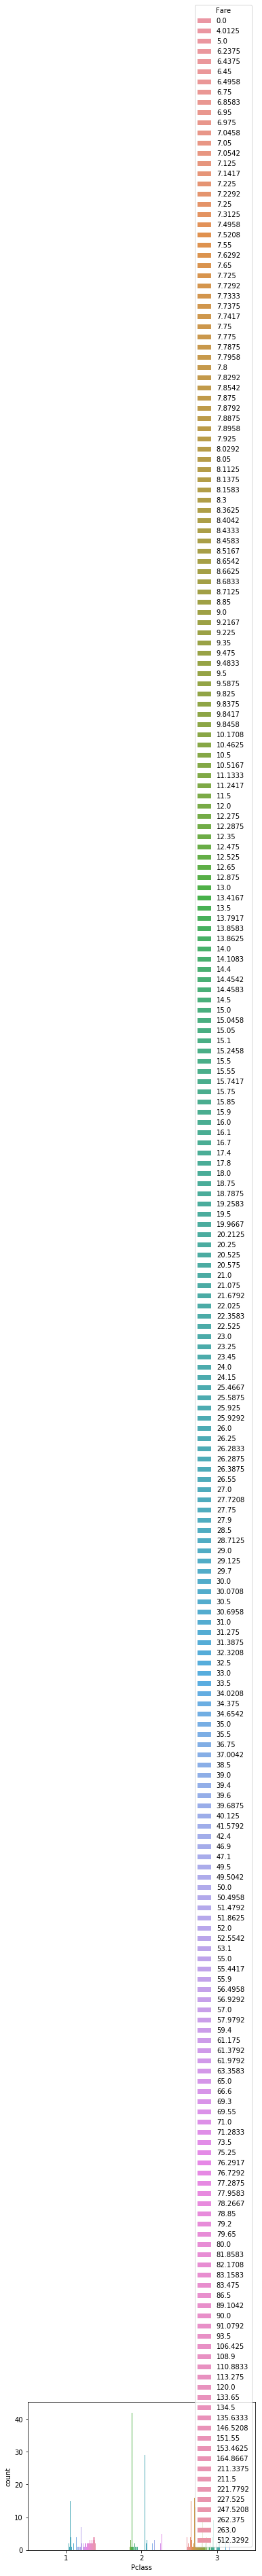

In [54]:
#改めてFareとPclassの関係をみてみると同じpclass1の中にもFareの差がある。263,512という飛び抜けて高い席もある。pclass1の中でもさらにFareで分けてみる。
sns.countplot("Pclass", data = df_train, hue = "Fare")

In [55]:
df_train[df_train.Fare == df_train.Fare.max()]
#５１２払っている人はみんな生きている

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C


In [56]:
df_train[df_train.Fare == 263]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0,C23 C25 C27,S
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.0,C23 C25 C27,S
341,342,1,1,"Fortune, Miss. Alice Elizabeth",female,24.0,3,2,19950,263.0,C23 C25 C27,S
438,439,0,1,"Fortune, Mr. Mark",male,64.0,1,4,19950,263.0,C23 C25 C27,S


In [57]:
df_train[df_train.Fare == 262.375]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
311,312,1,1,"Ryerson, Miss. Emily Borie",female,18.0,2,2,PC 17608,262.375,B57 B59 B63 B66,C
742,743,1,1,"Ryerson, Miss. Susan Parker ""Suzette""",female,21.0,2,2,PC 17608,262.375,B57 B59 B63 B66,C


In [58]:
df_train[df_train.Fare == 247.5208]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
118,119,0,1,"Baxter, Mr. Quigg Edmond",male,24.0,0,1,PC 17558,247.5208,B58 B60,C
299,300,1,1,"Baxter, Mrs. James (Helene DeLaudeniere Chaput)",female,50.0,0,1,PC 17558,247.5208,B58 B60,C


In [59]:
df_train[df_train.Fare == 211.3375]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
689,690,1,1,"Madill, Miss. Georgette Alexandra",female,15.0,0,1,24160,211.3375,B5,S
730,731,1,1,"Allen, Miss. Elisabeth Walton",female,29.0,0,0,24160,211.3375,B5,S
779,780,1,1,"Robert, Mrs. Edward Scott (Elisabeth Walton Mc...",female,43.0,0,1,24160,211.3375,B3,S


In [60]:
df_train[df_train.Fare == 164.8667]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
318,319,1,1,"Wick, Miss. Mary Natalie",female,31.0,0,2,36928,164.8667,C7,S
856,857,1,1,"Wick, Mrs. George Dennick (Mary Hitchcock)",female,45.0,1,1,36928,164.8667,NaN,S


In [61]:
df_train[df_train.Fare == 90]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
224,225,1,1,"Hoyt, Mr. Frederick Maxfield",male,38.0,1,0,19943,90.0,C93,S
245,246,0,1,"Minahan, Dr. William Edward",male,44.0,2,0,19928,90.0,C78,Q
412,413,1,1,"Minahan, Miss. Daisy E",female,33.0,1,0,19928,90.0,C78,Q
486,487,1,1,"Hoyt, Mrs. Frederick Maxfield (Jane Anne Forby)",female,35.0,1,0,19943,90.0,C93,S


In [62]:
df_train[df_train.Fare == 59.4]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
513,514,1,1,"Rothschild, Mrs. Martin (Elizabeth L. Barrett)",female,54.0,1,0,PC 17603,59.4,NaN,C


In [63]:
df_train[df_train.Fare == 42.4]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
602,603,0,1,"Harrington, Mr. Charles H",male,NaN,0,0,113796,42.4,NaN,S


In [64]:
df_train[(df_train.Fare < 100) & (df_train.Pclass == 1)]
#pclass1でもFareが100以下だとなくなった人も結構いる

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
23,24,1,1,"Sloper, Mr. William Thompson",male,28.0,0,0,113788,35.5000,A6,S
30,31,0,1,"Uruchurtu, Don. Manuel E",male,40.0,0,0,PC 17601,27.7208,NaN,C
34,35,0,1,"Meyer, Mr. Edgar Joseph",male,28.0,1,0,PC 17604,82.1708,NaN,C
35,36,0,1,"Holverson, Mr. Alexander Oskar",male,42.0,1,0,113789,52.0000,NaN,S
52,53,1,1,"Harper, Mrs. Henry Sleeper (Myna Haxtun)",female,49.0,1,0,PC 17572,76.7292,D33,C
54,55,0,1,"Ostby, Mr. Engelhart Cornelius",male,65.0,0,1,113509,61.9792,B30,C


In [93]:
df_train[(df_train.Fare >= 100) & (df_train.Fare < 200)&(df_train.Pclass == 1)].head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Pclass2
31,32,1,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",female,NaN,1,0,PC 17569,146.5208,B78,C,4
195,196,1,1,"Lurette, Miss. Elise",female,58.0,0,0,PC 17569,146.5208,B80,C,4
215,216,1,1,"Newell, Miss. Madeleine",female,31.0,1,0,35273,113.2750,D36,C,4
268,269,1,1,"Graham, Mrs. William Thompson (Edith Junkins)",female,58.0,0,1,PC 17582,153.4625,C125,S,4
269,270,1,1,"Bissette, Miss. Amelia",female,35.0,0,0,PC 17760,135.6333,C99,S,4


In [66]:
df_train[(df_train.Fare >= 200)&(df_train.Pclass == 1)]
#逆にpclass1でFareも高いと生きている人が多そう。Pclassを新たにFareで分割してみる

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0000,C23 C25 C27,S
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.0000,C23 C25 C27,S
118,119,0,1,"Baxter, Mr. Quigg Edmond",male,24.0,0,1,PC 17558,247.5208,B58 B60,C
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C
299,300,1,1,"Baxter, Mrs. James (Helene DeLaudeniere Chaput)",female,50.0,0,1,PC 17558,247.5208,B58 B60,C
311,312,1,1,"Ryerson, Miss. Emily Borie",female,18.0,2,2,PC 17608,262.3750,B57 B59 B63 B66,C
341,342,1,1,"Fortune, Miss. Alice Elizabeth",female,24.0,3,2,19950,263.0000,C23 C25 C27,S
377,378,0,1,"Widener, Mr. Harry Elkins",male,27.0,0,2,113503,211.5000,C82,C
380,381,1,1,"Bidois, Miss. Rosalie",female,42.0,0,0,PC 17757,227.5250,NaN,C
438,439,0,1,"Fortune, Mr. Mark",male,64.0,1,4,19950,263.0000,C23 C25 C27,S


In [92]:
df_train[(df_train.Fare >50) &(df_train.Fare < 100) & (df_train.Pclass == 1)].head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Pclass2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,3
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,3
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,3
34,35,0,1,"Meyer, Mr. Edgar Joseph",male,28.0,1,0,PC 17604,82.1708,NaN,C,3
35,36,0,1,"Holverson, Mr. Alexander Oskar",male,42.0,1,0,113789,52.0000,NaN,S,3


In [68]:
df_train[(df_train.Fare <50)& (df_train.Pclass == 1)].head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
23,24,1,1,"Sloper, Mr. William Thompson",male,28.0,0,0,113788,35.5000,A6,S
30,31,0,1,"Uruchurtu, Don. Manuel E",male,40.0,0,0,PC 17601,27.7208,NaN,C
55,56,1,1,"Woolner, Mr. Hugh",male,NaN,0,0,19947,35.5000,C52,S
64,65,0,1,"Stewart, Mr. Albert A",male,NaN,0,0,PC 17605,27.7208,NaN,C


In [69]:
#とりあえずざっくりpclassをFare>200,100<Fare<200, Fare<100,50<Fare<100, 25<Fare<50, Fare<25に分けてみる
def pclass_select(fare):
        if fare >200:
            return 5
        elif fare <=200 and fare >100:
            return 4
        elif fare <100 and fare>50:
            return 3
        elif fare<50 and fare >25:
            return 2
        else:
            return 1

In [70]:
df_train["Pclass2"] = df_train.Fare.apply(pclass_select)
df_train["Pclass2"][df_train["Pclass2"]==5]

27     5
88     5
118    5
258    5
299    5
311    5
341    5
377    5
380    5
438    5
527    5
557    5
679    5
689    5
700    5
716    5
730    5
737    5
742    5
779    5
Name: Pclass2, dtype: int64

In [71]:
df_train["Pclass2"][df_train["Pclass2"]==5]

27     5
88     5
118    5
258    5
299    5
311    5
341    5
377    5
380    5
438    5
527    5
557    5
679    5
689    5
700    5
716    5
730    5
737    5
742    5
779    5
Name: Pclass2, dtype: int64

In [72]:
df_train[df_train.Pclass2 == 3].head()
#確かに100以下50以上の人がPclass2で3になっている

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Pclass2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,3
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,3
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,3
34,35,0,1,"Meyer, Mr. Edgar Joseph",male,28.0,1,0,PC 17604,82.1708,NaN,C,3
35,36,0,1,"Holverson, Mr. Alexander Oskar",male,42.0,1,0,113789,52.0000,NaN,S,3


In [73]:
t=pd.concat([e,df_train["Pclass2"]], axis=1)
a_2=t.loc[:,"Pclass2"]
b_1=t.loc[:,"Survived"]
X_2 = a_2.values
y_1 = b_1.values

In [74]:
t.head()

,PassengerId,Survived,Pclass,Name,female,male,Age,SibSp,Parch,Ticket,Fare,Cabin,C,Q,S,Pclass2
0,1,0,3,"Braund, Mr. Owen Harris",0,1,22.0,1,0,A/5 21171,7.2500,NaN,0,0,1,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,0,38.0,1,0,PC 17599,71.2833,C85,1,0,0,3
2,3,1,3,"Heikkinen, Miss. Laina",1,0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,0,1,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,0,35.0,1,0,113803,53.1000,C123,0,0,1,3
4,5,0,3,"Allen, Mr. William Henry",0,1,35.0,0,0,373450,8.0500,NaN,0,0,1,1


In [75]:
t.Pclass.head()

0    3
1    1
2    3
3    1
4    3
Name: Pclass, dtype: int64

In [76]:
t.Pclass2.head()
#確かに分類できたので、Pclass2でもう一度やってみる

0    1
1    3
2    1
3    3
4    1
Name: Pclass2, dtype: int64

In [77]:
a_２=t.loc[:,["Pclass2","male"]]
b_2=t.loc[:,"Survived"]
X_2 = a_2.values
y_2 = b_2.values

In [78]:
a_3=t.loc[:,["Pclass","male"]]
b_3=t.loc[:,"Survived"]
X_3 = a_3.values
y_3 = b_3.values

In [79]:
from sklearn.model_selection import train_test_split
X_3_train, X_3_test, y_3_train, y_3_test = train_test_split(X_3, y_3, test_size=0.3, random_state=0)

In [80]:
from sklearn.tree import DecisionTreeClassifier
tree_3= DecisionTreeClassifier(random_state=0)
tree_3.fit(X_3_train, y_3_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

In [81]:
tree_3.score(X_3_train, y_3_train)

0.7865168539325843

In [82]:
tree_3.score(X_3_test, y_3_test)

0.78731343283582089

In [83]:
from sklearn.model_selection import train_test_split
X_2_train, X_2_test, y_2_train, y_2_test = train_test_split(X_2, y_2, test_size=0.3, random_state=0)

In [84]:
from sklearn.tree import DecisionTreeClassifier
tree_2= DecisionTreeClassifier(random_state=0)
tree_2.fit(X_2_train, y_2_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

In [85]:
tree_2.score(X_2_train, y_2_train)

0.7865168539325843

In [86]:
tree_2.score(X_2_test, y_2_test)

0.78731343283582089

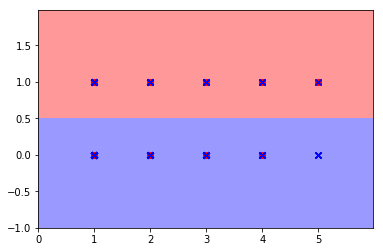

In [87]:
plot_decision_regions(X_2_train, y_2_train, tree_2)

In [88]:
from sklearn.ensemble import RandomForestClassifier
rfc_2 = RandomForestClassifier(random_state=0, n_estimators=40)
rfc_2.fit(X_2_train, y_2_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=40, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [89]:
rfc_2.score(X_2_train, y_2_train)

0.7865168539325843

In [90]:
rfc_2.score(X_2_test, y_2_test)
#性別だけでなくをさらに年齢で分けてみる。若くさらに女性の方が救出されやすそう

0.78731343283582089

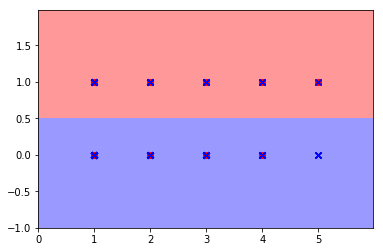

In [91]:
plot_decision_regions(X_2_train, y_2_train, rfc_2)